## 1、决策树回归算法核心思想
### 1.1、决策树结构回顾

**决策树的典型结构如下图所示：**

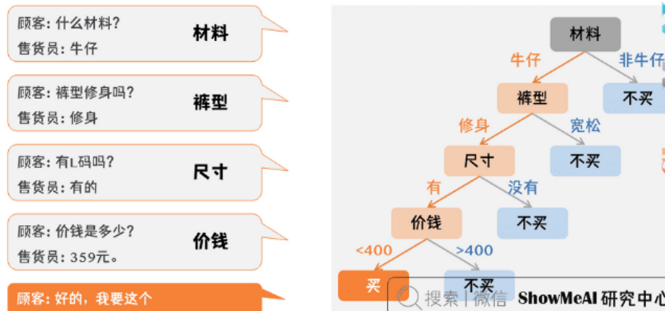



**主流的决策树算法有**：
- **ID3**：基于**信息增益**来选择分裂属性（每步选择信息增益最大的属性作为分裂节点，树可能是多叉的）。
- **C4.5**：基于**信息增益率**来选择分裂属性（每步选择信息增益率最大的属性作为分裂节点，树可能是多叉的）。
- **CART**：基于**基尼系数**来构建决策树（每步要求基尼系数最小，树是二叉的）。
    - 其中：CART树全称Classification And Regression Tree，即可以用于分类，也可以用于回归，这里指的回归树就是 CART 树，ID3和C4.5不能用于回归问题。

具体如下图：
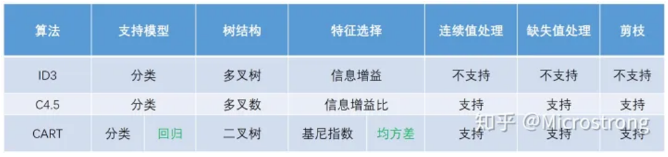

## 2、回归树算法原理

回归树的构建核心问题：

- **如何选择划分点？**
- **如何决定树中叶节点的输出值？**

假设X和Y分别为输入和输出变量，并且Y是连续变量，给定训练数据集D,考虑如何生成回归树。

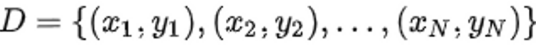

一个回归树对应着输入空间（即特征空间）的一个划分以及在划分的单元上的输出值。假设已将输入空间划分为M个单元 R1,R2,…RM ，并且在每个单元 Rm上有一个固定的输出值 Cm ，于是回归树模型可以表示为：

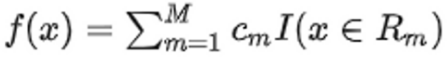

当输入空间的划分确定时，可以用平方误差：
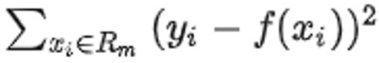
来表示回归树对于训练数据的预测误差；用平方误差最小的准则求解每个单元上的最优输出值。易知，单元Rm上的 Cm的最优值 C^m 是Rm上的所有输入实例 Xi对应的输出 Yi 的均值，即：

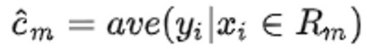

### 2.1问题1：怎样对输入空间进行划分？即如何选择划分点？

CART回归树采用启发式的****递归二分****方法对输入空间进行划分，「自顶向下的贪婪式递归方案」，指的是每一次的划分，只考虑当前最优，而不回头考虑之前的划分

选择第j个变量 X^j 和它取的值s，作为切分变量（splitting variable）和切分点（splitting point），并定义两个区域：

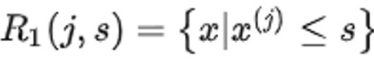
和
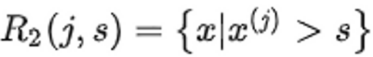


然后寻找最优切分变量j和最优切分点s。具体地，求解：
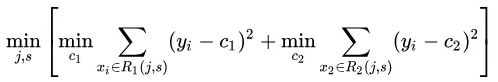
对固定输入变量j可以找到最优切分点s。

### 2.2、问题2：如何决定树中叶节点的输出值？
用选定的最优切分变量j和最优切分点s划分区域并决定相应的输出值：
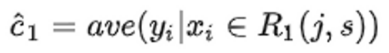
和
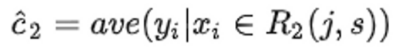

遍历所有输入变量，找到最优的切分变量j，构成一个对（j, s）。依此将输入空间划分为两个区域。接着，对每个区域重复上述划分过程，直到满足停止条件为止。这样就生成一颗回归树。这样的回归树通常称为最小二乘回归树（least squares regression tree）。
如果已将输入空间划分为M个区域R1,R2,…Rm，并且在每个区域Rm上有一个固定的输出值C^m，于是回归树模型可以表示为：
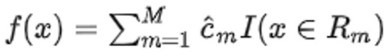

### 2.3 算法流程
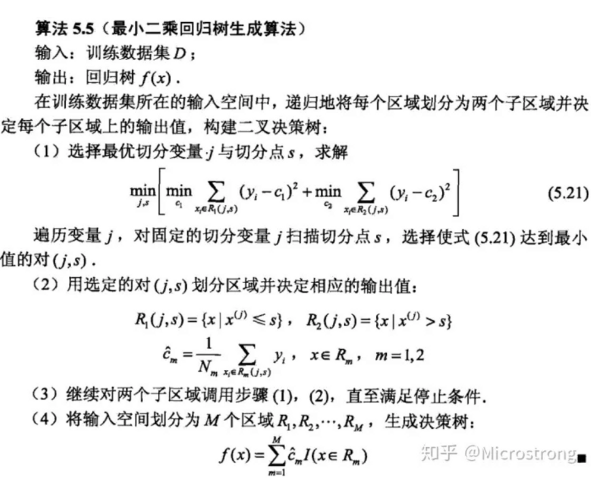

## 3、回归树案例
本示例来源于李航著的《统计学习方法》第5章决策树习题中的5.2题。已知如图3所示的训练数据，试用平方误差损失准则生成一个二叉回归树。
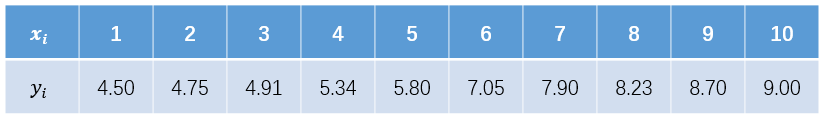

寻找最优切分变量j和最优切分点s的方法为：
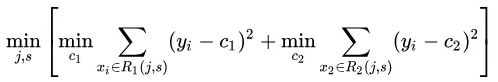

其中，
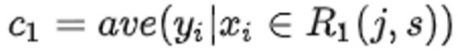
和
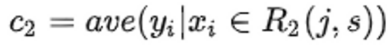

例如，取s=1。此时 R1={1} ， R2={2,3,4,5,6,7,8,9,10} ，这两个区域的输出值分别为：

C1=4.50

C2=1/9(4.75+4.91+5.34+5.80+7.05+7.90+8.23+8.70+9.00)=6.85

根据上面的计算方法，可以得到下表：
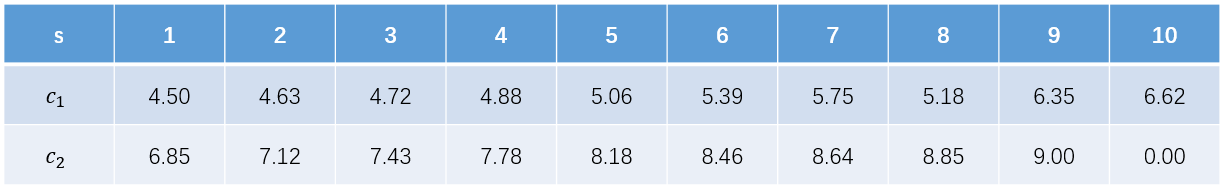

把 C1,C2 的值代入到均方差中，如下：

C(1)=0+{(4.75−6.85)^2+(4.91−6.85)^2+(5.34−6.85)^2+(5.80−6.85)^2+(7.05−6.85)^2+(7.90−6.85)^2+(8.23−6.85)^2+(8.70−6.85)^2+(9.00−6.85)^2}=22.65

同理，可以获得下表：
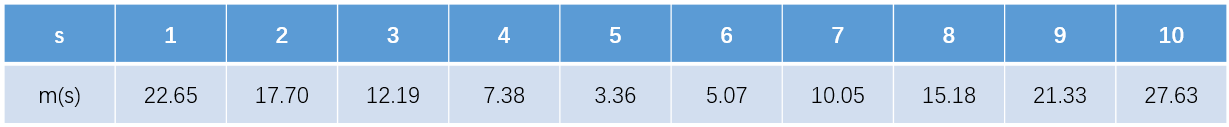

显然取s=5时，m(s)最小。因此，第一个最优切分变量为j=5.8、最优切分点为s=5。


**3.1、用选定的（j，s）划分区域，并决定输出值：**

两个划分的区域分别是： R1={1,2,3,4,5},R2={6,7,8,9,10} 。输出值用公式：

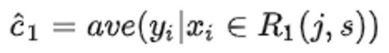
和
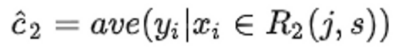
得到 C1=5.06,C2=8.18 。

**3.2、对两个子区域继续调用算法流程中的步骤（1），（2）**


对 R1 继续进行划分：
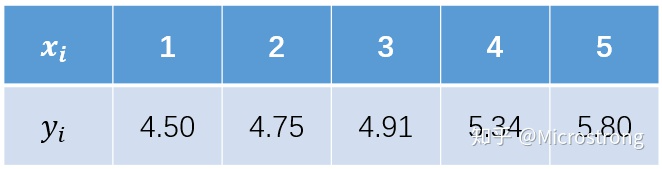
取切分点分别为：[1, 2, 3, 4, 5]，则各个区域的输出值c如下表：
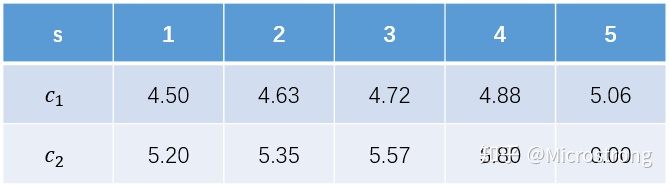

计算m(s)：
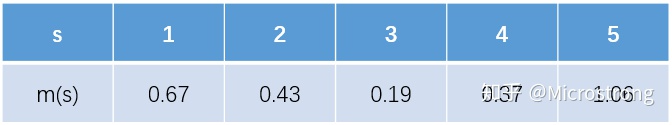
s=3时，m(3)最小。
之后的递归过程同上，我就不在赘述啦！最后，如下图所示给出完整的二叉回归树：
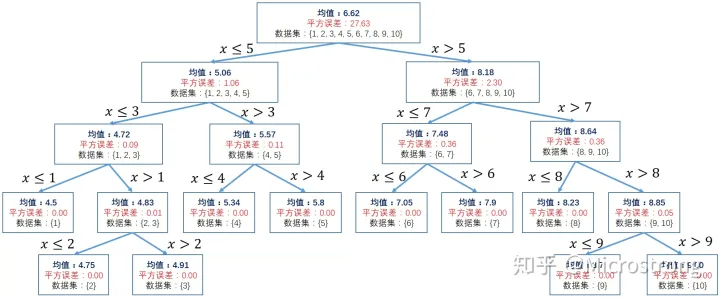

## 4.、关于回归树的若干问题

**4.1、CART实现分类树与回归树的区别？**

CART分类树是一种二分递归分割的技术，分割方法采用基于最小距离的基尼指数估计函数，将当前的样本集分为两个子样本集，使得生成的的每个非叶子节点都有两个分支。因此，CART算法生成的决策树是结构简洁的二叉树。

CART分类树是针对目标变量是离散型变量，通过二叉树将数据进行分割成离散类的方法。而回归树则是针对目标变量是连续性的变量，通过选取最优分割特征的某个值，然后数据根据大于或者小于这个值进行划分进行树分裂最终生成回归树。

**4.2、树形结构为什么不需要归一化？**

因为数值缩放不影响分裂点位置，对树模型的结构不造成影响。 按照特征值进行排序的，排序的顺序不变，那么所属的分支以及分裂点就不会有不同。而且，树模型是不能进行梯度下降的，因为构建树模型（回归树）寻找最优点时是通过寻找最优分裂点完成的，因此树模型是阶跃的，阶跃点是不可导的，并且求导没意义，也就不需要归一化。

**4.3、既然树形结构（如决策树、RF）不需要归一化，那为何非树形结构比如Adaboost、SVM、LR、KNN、K-Means之类则需要归一化？**

对于线性模型，特征值差别很大时，运用梯度下降的时候，损失等高线是椭圆形，需要进行多次迭代才能到达最优点。 但是如果进行了归一化，那么等高线就是圆形的，促使SGD往原点迭代，从而导致需要的迭代次数较少。

**4.4、决策树如何剪枝？**

决策树的剪枝基本策略有预剪枝 (Pre-Pruning)和后剪枝 (Post-Pruning)。

- **预剪枝**：其中的核心思想就是，在每一次实际对结点进行进一步划分之前，先采用验证集的数据来验证如果划分是否能提高划分的准确性。如果不能，就把结点标记为叶结点并退出进一步划分；如果可以就继续递归生成节点。
- **后剪枝**：后剪枝则是先从训练集生成一颗完整的决策树，然后自底向上地对非叶结点进行考察，若将该结点对应的子树替换为叶结点能带来泛化性能提升，则将该子树替换为叶结点。

在第3节回归树的示例中，我没有对生成的二叉回归树进行剪枝，感兴趣的同学可以自己尝试实现预剪枝和后剪枝，来避免生成的二叉回归树过拟合。


### 代码演示-Regression Tree
- 数据集 iris
- sklearn


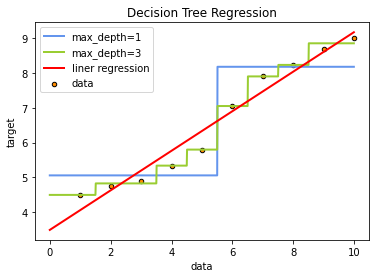

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 5、总结

实际上，回归树总体流程类似于分类树，分枝时穷举每一个特征的每一个阈值，来寻找最优切分特征和最优切分点，衡量的方法是平方误差最小化。分枝直到达到预设的终止条件为止。